In [1]:
import findspark
findspark.init()

In [19]:
#Tugas 1
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Admin shopee", "Lari", "L"), ("Budi", 23, "Pegawai Swasta", "Futsal", "L"), ("Citra", 29, "Perawat", "Hiking", "P"), ("Dina", 45, "Guru", "Menari", "P"),("Noufal",25,"Software Engginer","Game","L")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
print("Menampilkan DataFrame")  
df.show()


Menampilkan DataFrame
+------+----+-----------------+------+------+
|  Nama|Usia|        Pekerjaan|  Hobi|Gender|
+------+----+-----------------+------+------+
|   Ali|  34|     Admin shopee|  Lari|     L|
|  Budi|  23|   Pegawai Swasta|Futsal|     L|
| Citra|  29|          Perawat|Hiking|     P|
|  Dina|  45|             Guru|Menari|     P|
|Noufal|  25|Software Engginer|  Game|     L|
+------+----+-----------------+------+------+



In [21]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina","Noufal"], "Usia": [34, 23, 29, 45,25]}
print("DataFrame sebelum di fliter")  
df_pandas = pd.DataFrame(data_pandas)
df.show()

# Menampilkan DataFrame Pandas
df_pandas

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
print("DataFrame sesudah di fliter Usia Lebih dari 30 tahun")  
df_filtered.show()

df_filtered = df.filter(df['Usia'] < 30)
print("DataFrame sesudah di fliter Usia kurang dari 30 tahun")  
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
print("Menghitung rata rata usia")
df.groupBy().agg(avg("Usia")).show()
 

DataFrame sebelum di fliter
+------+----+-----------------+------+------+
|  Nama|Usia|        Pekerjaan|  Hobi|Gender|
+------+----+-----------------+------+------+
|   Ali|  34|     Admin shopee|  Lari|     L|
|  Budi|  23|   Pegawai Swasta|Futsal|     L|
| Citra|  29|          Perawat|Hiking|     P|
|  Dina|  45|             Guru|Menari|     P|
|Noufal|  25|Software Engginer|  Game|     L|
+------+----+-----------------+------+------+

DataFrame sesudah di fliter Usia Lebih dari 30 tahun
+----+----+------------+------+------+
|Nama|Usia|   Pekerjaan|  Hobi|Gender|
+----+----+------------+------+------+
| Ali|  34|Admin shopee|  Lari|     L|
|Dina|  45|        Guru|Menari|     P|
+----+----+------------+------+------+

DataFrame sesudah di fliter Usia kurang dari 30 tahun
+------+----+-----------------+------+------+
|  Nama|Usia|        Pekerjaan|  Hobi|Gender|
+------+----+-----------------+------+------+
|  Budi|  23|   Pegawai Swasta|Futsal|     L|
| Citra|  29|          Perawat|

In [22]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina","Noufal"], "Usia": [34, 23, 29, 45,20],"Asal":["Jakarta","Pekanbaru","Sumedang","Banjar","Magelang"]}
df_pandas = pd.DataFrame(data_pandas)

#menampilkan data sebelum difiltering
print("Data sebelum di filter")
print(df_pandas)
print()

#filtering berdasarkan usia
print("Filtering data berdasarkan usia")
df_filter = df_pandas[df_pandas["Usia"] < 30]

# Menampilkan DataFrame Pandas
df_filter = pd.DataFrame(df_filter)
df_filter

Data sebelum di filter
     Nama  Usia       Asal
0     Ali    34    Jakarta
1    Budi    23  Pekanbaru
2   Citra    29   Sumedang
3    Dina    45     Banjar
4  Noufal    20   Magelang

Filtering data berdasarkan usia


,Nama,Usia,Asal
1,Budi,23,Pekanbaru
2,Citra,29,Sumedang
4,Noufal,20,Magelang


DataFrame setelah penggabungan:
    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat

Statistik deskriptif Usia:
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


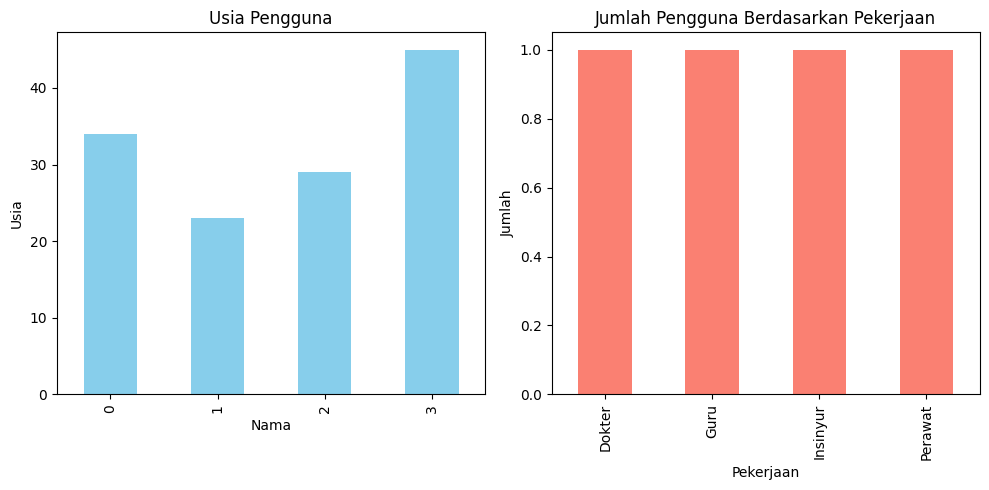

In [23]:
import pandas as pd  
import matplotlib.pyplot as plt  

# Membuat DataFrame Pandas pertama  
data_pandas = {  
    "Nama": ["Ali", "Budi", "Citra", "Dina"],  
    "Usia": [34, 23, 29, 45]  
}  
df_pandas = pd.DataFrame(data_pandas)  

# Membuat DataFrame Pandas kedua  
data_pandas_2 = {  
    "Nama": ["Ali", "Budi", "Citra", "Dina"],  
    "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]  
}  
df_pandas_2 = pd.DataFrame(data_pandas_2)  

# Menggabungkan kedua DataFrame  
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")  
print("DataFrame setelah penggabungan:")  
print(df_joined)  

# Menghitung statistik deskriptif  
print("\nStatistik deskriptif Usia:")  
print(df_pandas.describe())  

# Visualisasi data  
plt.figure(figsize=(10, 5))  

# Plot usia  
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot  
df_pandas['Usia'].plot(kind='bar', color='skyblue')  
plt.title('Usia Pengguna')  
plt.xlabel('Nama')  
plt.ylabel('Usia')  

# Plot pekerjaan  
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot  
df_joined['Pekerjaan'].value_counts().plot(kind='bar', color='salmon')  
plt.title('Jumlah Pengguna Berdasarkan Pekerjaan')  
plt.xlabel('Pekerjaan')  
plt.ylabel('Jumlah')  

plt.tight_layout()  # Untuk mengatur layout agar tidak tumpang tindih  
plt.show()

In [28]:
# Import library  
import pandas as pd  
from pyspark.sql import SparkSession  

# Membuat Spark session  
spark = SparkSession.builder \
    .appName("Example") \
    .getOrCreate()  

# Data untuk DataFrame PySpark dan Pandas  
data_combined = [("Ali", 34, "Jakarta"),  
                 ("Budi", 23, "Pekanbaru"),  
                 ("Citra", 29, "Sumedang"),  
                 ("Dina", 45, "Banjar"),  
                 ("Noufal", 20, "Magelang")]  

# Membuat DataFrame PySpark secara langsung  
df_combined = spark.createDataFrame(data_combined, schema=["Nama", "Usia", "Asal"])  

# Menampilkan DataFrame hasil  
print("DataFrame Gabungan:")  
df_combined.show()  

# Menghitung nilai maksimum usia  
max_age = df_combined.agg({"Usia": "max"}).first()[0]  
print(f"Nilai maksimum usia: {max_age}")

DataFrame Gabungan:
+------+----+---------+
|  Nama|Usia|     Asal|
+------+----+---------+
|   Ali|  34|  Jakarta|
|  Budi|  23|Pekanbaru|
| Citra|  29| Sumedang|
|  Dina|  45|   Banjar|
|Noufal|  20| Magelang|
+------+----+---------+

Nilai maksimum usia: 45


In [31]:
# Import library  
import pandas as pd  
from pyspark.sql import SparkSession  

# Membuat Spark session  
spark = SparkSession.builder.appName("Example").getOrCreate()  

# Data untuk DataFrame  
data_combined = [("Ali", 34, "Jakarta"),  
                 ("Budi", 23, "Pekanbaru"),  
                 ("Citra", 29, "Sumedang"),  
                 ("Dina", 45, "Banjar"),  
                 ("Noufal", 20, "Magelang")]  

# Membuat DataFrame Spark dari data langsung  
df_combined = spark.createDataFrame(data_combined, schema=["Nama", "Usia", "Asal"])  


# Menampilkan DataFrame hasil  
print("DataFrame Gabungan:")  
df_combined.show()  

# Menghitung rata-rata usia  
average_age = df_combined.agg({"Usia": "avg"}).first()[0]  
print(f"Rata-rata usia: {average_age}")

DataFrame Gabungan:
+------+----+---------+
|  Nama|Usia|     Asal|
+------+----+---------+
|   Ali|  34|  Jakarta|
|  Budi|  23|Pekanbaru|
| Citra|  29| Sumedang|
|  Dina|  45|   Banjar|
|Noufal|  20| Magelang|
+------+----+---------+

Rata-rata usia: 30.2
